In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import joblib

from data_preprocessing import pipeline, filter_unnecessary_columns
from feature_preprocessing import pipeline2

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [2]:
# Î°úÏö∞ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "./storage/raw_data/Î≥ëÌï©_Ï≤≠ÏïΩÎß§Î¨º_Î™©Î°ù_Ï†ïÎ≥¥_ÌîΩÏä§2.csv"
df = pd.read_csv(file_path)
df2 = pd.read_csv("./storage/raw_data/Í∏∞Ï§ÄÍ∏àÎ¶¨Ìëú.csv")

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
preprocessing_pipeline = pipeline(type='train')
df = preprocessing_pipeline.transform(df)

# ÎÖÑÎèÑÏôÄ ÏõîÎßå ÎÇ®Í∏∞Í∏∞
df['Î™®ÏßëÍ≥µÍ≥†Ïùº2'] = df['Î™®ÏßëÍ≥µÍ≥†Ïùº'].str[:7]

df = df.merge(df2, left_on='Î™®ÏßëÍ≥µÍ≥†Ïùº2', right_on='Î≥ÄÍ≤ΩÏùºÏûê', how='left').drop(columns=['Î≥ÄÍ≤ΩÏùºÏûê', 'Î™®ÏßëÍ≥µÍ≥†Ïùº2'])

# ÌïôÏäµÌï† Î™®Îç∏Î≥ÑÎ°ú ÎìúÎûçÌï† ÏπºÎüº Ï†ïÏùò
# - ÏµúÍ≥†ÎãπÏ≤®Í∞ÄÏ†ê: Í≥µÍ∏âÏßÄÏó≠ÏΩîÎìú, Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê), Í≥µÍ∏âÏÑ∏ÎåÄÏàò
# ÏµúÏ†ÄÎãπÏ≤®Í∞ÄÏ†ê: Í≥µÍ∏âÏßÄÏó≠ÏΩîÎìú, Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê), Í≥µÍ∏âÏÑ∏ÎåÄÏàò
# ÏãúÏÑ∏Ï∞®Ïùµ: Í≥µÍ∏âÏßÄÏó≠ÏΩîÎìú, Í≥µÍ∏âÏÑ∏ÎåÄÏàò

# #  -----------------------------ÏµúÍ≥†, ÏµúÏ†ÄÎãπÏ†êÍ∞ÄÏ†êÏö©-----------------------------------
# df['ÏãúÏÑ∏Ï∞®Ïùµ'] = df['Ï†ÑÏö©Î©¥Ï†Å'] * df['Ï†ÑÏö©Î©¥Ï†ÅÎãπ ÏãúÏÑ∏Ï∞®Ïùµ']
# df.drop(columns=['Ï†ÑÏö©Î©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†ÅÎãπ ÏãúÏÑ∏Ï∞®Ïùµ', 'Í≥µÍ∏âÍ∏àÏï°(ÏµúÍ≥†Í∞Ä Í∏∞Ï§Ä)'], inplace=True)
# # ÏµúÍ≥†, ÏµúÏ†ÄÎãπÏ†êÍ∞ÄÏ†êÏö©
# df.drop(['Í≥µÍ∏âÏßÄÏó≠ÏΩîÎìú', 'Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)', 'Í≥µÍ∏âÏÑ∏ÎåÄÏàò'], axis=1, inplace=True)


#  -----------------------------ÏãúÏÑ∏Ï∞®ÏùµÏö©-----------------------------------
# ÏãúÏÑ∏Ï∞®Ïùµ Ìï† Îïå featureÏóêÏÑú Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê) Ïù¥Î∂ÄÎ∂Ñ Ïä§ÏºÄÏùºÎßÅ Ìï¥Ï£ºÍ∏∞
df['ÏãúÏÑ∏Ï∞®Ïùµ'] = df['Ï†ÑÏö©Î©¥Ï†Å'] * df['Ï†ÑÏö©Î©¥Ï†ÅÎãπ ÏãúÏÑ∏Ï∞®Ïùµ']
df.drop(columns=['Ï†ÑÏö©Î©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†ÅÎãπ ÏãúÏÑ∏Ï∞®Ïùµ', 'Í≥µÍ∏âÍ∏àÏï°(ÏµúÍ≥†Í∞Ä Í∏∞Ï§Ä)', 'Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)'], inplace=True)
df.drop(['Í≥µÍ∏âÏßÄÏó≠ÏΩîÎìú', 'Í≥µÍ∏âÏÑ∏ÎåÄÏàò', 'Î™®ÏßëÍ≥µÍ≥†Ïùº'], axis=1, inplace=True)


# ÌååÏùº Ï†ÄÏû•
file_version = "250321-ÏãúÏÑ∏Ï∞®Ïùµ-Í∏àÎ¶¨Ï∂îÍ∞Ä"
output_file = f"./storage/train_data/train-{file_version}.csv"
df.to_csv(output_file, index=False, encoding='cp949')

/var/folders/pl/c9208lms3f937xrsflvwrm640000gn/T/ipykernel_55716/15059087.py:3: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/Users/apple/developments/hk-project/src/data_preprocessing.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ÏµúÍ≥†ÎãπÏ≤®Í∞ÄÏ†ê"].fillna(0, inplace=True)
/Users/apple/developments/hk-project/src/data_preprocessing.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chaine

### Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä

In [3]:
topic_labels = {
    "ÌÜ†ÌîΩ 1": "ÌÜ†ÌîΩ1\n(Î∂ÑÏñëÍ∞ÄÏôÄ ÎåÄÏ∂ú Ï°∞Í±¥)",
    "ÌÜ†ÌîΩ 2": "ÌÜ†ÌîΩ2\n(Ï≤≠ÏïΩ Í≤ΩÏüÅÎ•† Î∞è ÏàúÏúÑ)",
    "ÌÜ†ÌîΩ 3": "ÌÜ†ÌîΩ3\n(ÏïÑÌååÌä∏ ÌÉÄÏûÖ Î∞è Ï°∞Í±¥)",
    "ÌÜ†ÌîΩ 4": "ÌÜ†ÌîΩ4\n(ÎãπÏ≤® Í∞ÄÏ†ê Î∞è Î°úÎòê Ï≤≠ÏïΩ)",
    "ÌÜ†ÌîΩ 5": "ÌÜ†ÌîΩ5\n(Î∂ÄÎèôÏÇ∞ ÏãúÏû•)",
    "ÌÜ†ÌîΩ 6": "ÌÜ†ÌîΩ6\n(Ïã†ÎèÑÏãú Í∞úÎ∞ú Î∞è Ïù∏ÌîÑÎùº Ï°∞ÏÑ±)",
    "ÌÜ†ÌîΩ 7": "ÌÜ†ÌîΩ7\n(Ï≤≠ÏïΩ Ï†ëÏàò Î∞è ÏïÑÌååÌä∏ Î©¥Ï†Å)",
}

In [3]:
# Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

file_version = "250321-ÏãúÏÑ∏Ï∞®Ïùµ-Í∏àÎ¶¨Ï∂îÍ∞Ä"
file_path = f"./storage/train_data/train-{file_version}.csv"
df = pd.read_csv(file_path, encoding='cp949')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Í≥µÍ∏âÏßÄÏó≠Î™Ö         1866 non-null   object 
 1   Í≥µÍ∏âÍ∑úÎ™®          1866 non-null   int64  
 2   Ìà¨Í∏∞Í≥ºÏó¥ÏßÄÍµ¨        1866 non-null   object 
 3   Ï°∞Ï†ïÎåÄÏÉÅÏßÄÏó≠        1866 non-null   object 
 4   Î∂ÑÏñëÍ∞ÄÏÉÅÌïúÏ†ú        1866 non-null   object 
 5   Ï†ïÎπÑÏÇ¨ÏóÖ          1866 non-null   object 
 6   Í≥µÍ≥µÏ£ºÌÉùÏßÄÍµ¨        1866 non-null   object 
 7   ÎåÄÍ∑úÎ™®ÌÉùÏßÄÍ∞úÎ∞úÏßÄÍµ¨     1866 non-null   object 
 8   ÏàòÎèÑÍ∂åÎÇ¥ÎØºÏòÅÍ≥µÍ≥µÏ£ºÌÉùÏßÄÍµ¨  1866 non-null   object 
 9   Í±∞Ï£ºÏßÄÏó≠          1866 non-null   object 
 10  Ï†ëÏàòÍ±¥Ïàò          1866 non-null   float64
 11  Í≤ΩÏüÅÎ•†           1866 non-null   float64
 12  ÌÜ†ÌîΩ 1          1866 non-null   float64
 13  ÌÜ†ÌîΩ 2          1866 non-null   float64
 14  ÌÜ†ÌîΩ 3          1866 non-null   float64
 15  ÌÜ†ÌîΩ 

In [ ]:
topic_labels = {
    "ÌÜ†ÌîΩ 1": "ÌÜ†ÌîΩ1\n(Î∂ÑÏñëÍ∞ÄÏôÄ ÎåÄÏ∂ú Ï°∞Í±¥)",
    "ÌÜ†ÌîΩ 2": "ÌÜ†ÌîΩ2\n(Ï≤≠ÏïΩ Í≤ΩÏüÅÎ•† Î∞è ÏàúÏúÑ)",
    "ÌÜ†ÌîΩ 3": "ÌÜ†ÌîΩ3\n(ÏïÑÌååÌä∏ ÌÉÄÏûÖ Î∞è Ï°∞Í±¥)",
    "ÌÜ†ÌîΩ 4": "ÌÜ†ÌîΩ4\n(ÎãπÏ≤® Í∞ÄÏ†ê Î∞è Î°úÎòê Ï≤≠ÏïΩ)",
    "ÌÜ†ÌîΩ 5": "ÌÜ†ÌîΩ5\n(Î∂ÄÎèôÏÇ∞ ÏãúÏû•)",
    "ÌÜ†ÌîΩ 6": "ÌÜ†ÌîΩ6\n(Ïã†ÎèÑÏãú Í∞úÎ∞ú Î∞è Ïù∏ÌîÑÎùº Ï°∞ÏÑ±)",
    "ÌÜ†ÌîΩ 7": "ÌÜ†ÌîΩ7\n(Ï≤≠ÏïΩ Ï†ëÏàò Î∞è ÏïÑÌååÌä∏ Î©¥Ï†Å)",
}

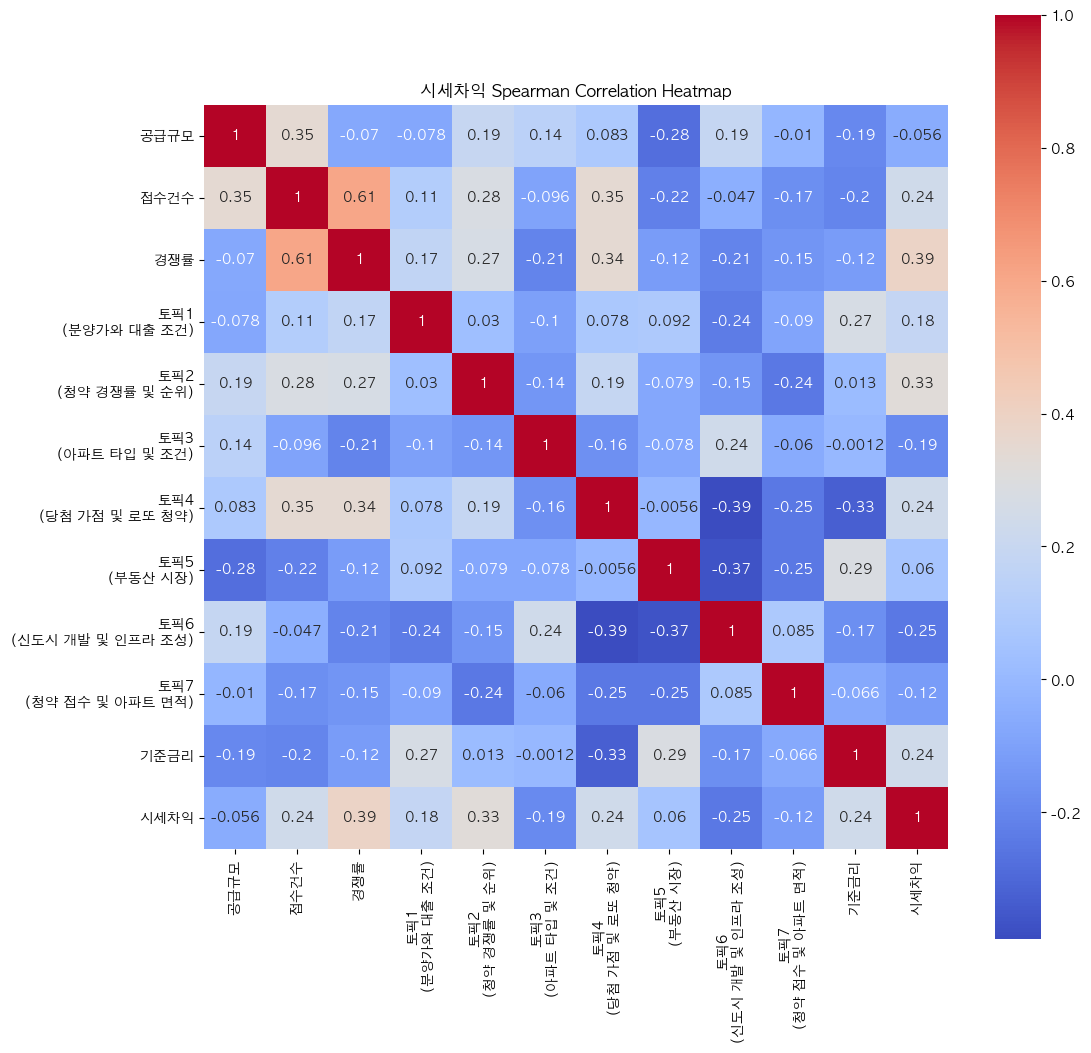

In [4]:
import seaborn as sns

numeric_df = df.select_dtypes(include=[np.number])

numeric_df.rename(columns=topic_labels, inplace=True)

corr_matrix = numeric_df.corr(method='spearman')

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('ÏãúÏÑ∏Ï∞®Ïùµ Spearman Correlation Heatmap')
plt.show()


In [5]:
X = df.drop(columns=["ÏãúÏÑ∏Ï∞®Ïùµ"])
Y = df["ÏãúÏÑ∏Ï∞®Ïùµ"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # ÌÉÄÍ≤ü
    Y,  
    test_size=0.2,
    random_state=42
)

In [6]:
feature_pipeline = pipeline2()

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(X_train)Ïóê fit
feature_pipeline.fit(X_train)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(X_train)Î•º Î≥ÄÌôò
X_train_transformed = feature_pipeline.transform(X_train)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(X_test)Î•º Î≥ÄÌôò
X_test_transformed = feature_pipeline.transform(X_test)

/opt/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/venv/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [36]:
# shap test data Ï†ÄÏû•

X_test_transformed.to_csv('./storage/shap_test_data/gain_lgb_X_test_transformed.csv', index=False)

In [37]:
# ÌîºÏ≥ê ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ÄÏû• 

version = 'gain_lgb_0.0.1'
joblib.dump(feature_pipeline, f"./storage/trained_pipeline/pipeline_{version}.pkl")

['./storage/trained_pipeline/pipeline_gain_lgb_0.0.1.pkl']

### ÌïôÏäµ

### LGB

In [7]:
topic_labels = {
    "ÌÜ†ÌîΩ 1": "ÌÜ†ÌîΩ1 (Î∂ÑÏñëÍ∞ÄÏôÄ ÎåÄÏ∂ú Ï°∞Í±¥)",
    "ÌÜ†ÌîΩ 2": "ÌÜ†ÌîΩ2 (Ï≤≠ÏïΩ Í≤ΩÏüÅÎ•† Î∞è ÏàúÏúÑ)",
    "ÌÜ†ÌîΩ 3": "ÌÜ†ÌîΩ3 (ÏïÑÌååÌä∏ ÌÉÄÏûÖ Î∞è Ï°∞Í±¥)",
    "ÌÜ†ÌîΩ 4": "ÌÜ†ÌîΩ4 (ÎãπÏ≤® Í∞ÄÏ†ê Î∞è Î°úÎòê Ï≤≠ÏïΩ)",
    "ÌÜ†ÌîΩ 5": "ÌÜ†ÌîΩ5 (Î∂ÄÎèôÏÇ∞ ÏãúÏû•)",
    "ÌÜ†ÌîΩ 6": "ÌÜ†ÌîΩ6 (Ïã†ÎèÑÏãú Í∞úÎ∞ú Î∞è Ïù∏ÌîÑÎùº Ï°∞ÏÑ±)",
    "ÌÜ†ÌîΩ 7": "ÌÜ†ÌîΩ7 (Ï≤≠ÏïΩ Ï†ëÏàò Î∞è ÏïÑÌååÌä∏ Î©¥Ï†Å)",
}

[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2239
[LightGBM] [Info] Number of data points in the train set: 1492, number of used features: 28
[LightGBM] [Info] Start training from score 640354316.321716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

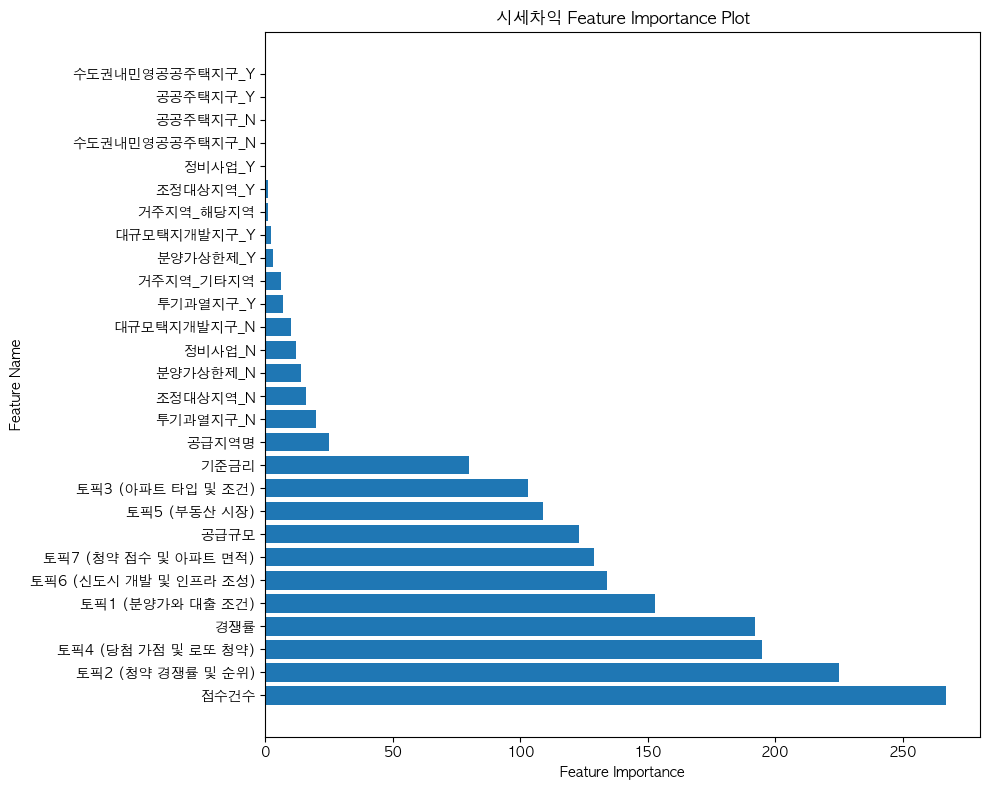

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# LightGBM Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
lgb_model = lgb.LGBMRegressor(
    max_depth=8, 
    num_leaves=119, 
    min_data_in_leaf=47, 
    subsample=0.7, 
    colsample_bytree=0.9, 
    learning_rate=0.1, 
    n_estimators=100
)

lgb_model.fit(X_train_transformed, y_train)

# Ïù¥ÌõÑÏóê rename ÏàòÌñâ (Í∑∏ÎûòÌîÑÏö©)
X_train_transformed.rename(columns=topic_labels, inplace=True)
X_test_transformed.rename(columns=topic_labels, inplace=True)

y_pred_lgb = lgb_model.predict(X_test_transformed)

# RMSEÏôÄ R^2 Í≥ÑÏÇ∞ Ìï®Ïàò
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
print(f"LightGBM - RMSE: {rmse_lgb}, R^2: {r2_lgb}")

# Feature Importance ÌèâÍ∑† Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
# LightGBM Î™®Îç∏Ïùò feature_importances_ ÏÜçÏÑ±ÏùÑ ÏÇ¨Ïö©
feature_importances = lgb_model.feature_importances_

# Feature Importance ÏãúÍ∞ÅÌôî
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.barh(X_train_transformed.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("ÏãúÏÑ∏Ï∞®Ïùµ Feature Importance Plot")
plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.show()


/opt/anaconda3/envs/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


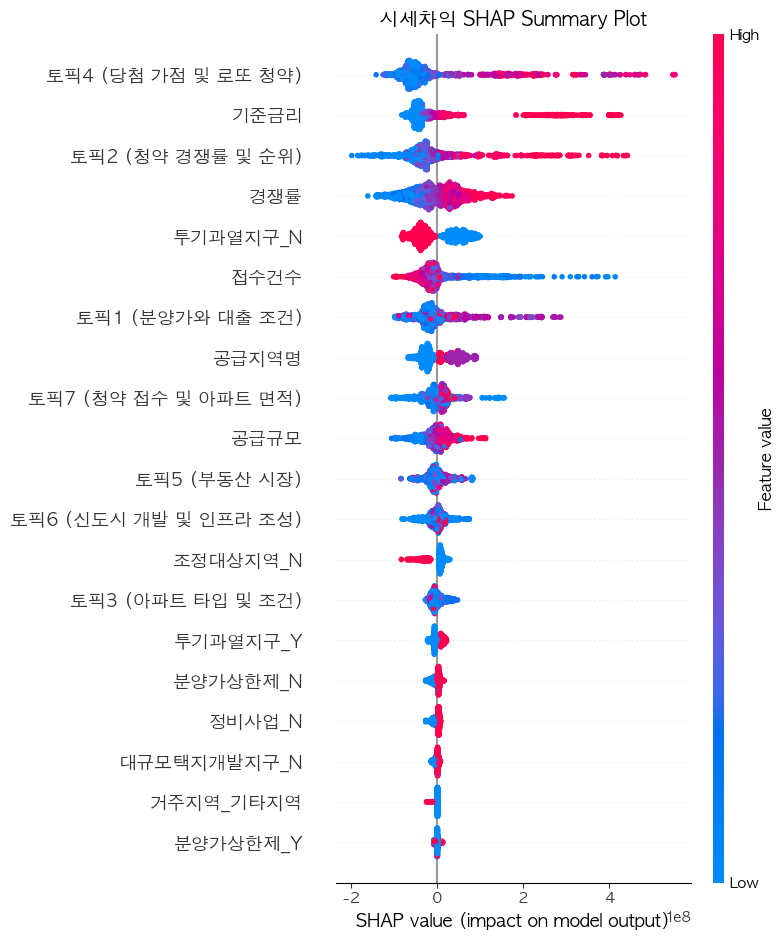

In [9]:
import shap
import matplotlib.pyplot as plt

# SHAP Í∞í Í≥ÑÏÇ∞
explainer = shap.Explainer(lgb_model)
shap_values = explainer(X_train_transformed)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_transformed, show=False)  # üîπ show=False: ÏûêÎèô show ÎßâÏùå

# üîΩ ÌÉÄÏù¥ÌãÄ Ï∂îÍ∞Ä
plt.title("ÏãúÏÑ∏Ï∞®Ïùµ SHAP Summary Plot", fontsize=14)
plt.tight_layout()
plt.show()


### XGB

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# XGBoost Î™®Îç∏ ÏÉùÏÑ±
xgb_model = xgb.XGBRegressor()

xgb_param_grid = {
    'max_depth': np.arange(3, 9),  
    'min_child_weight': np.arange(1, 5),  
    'subsample': np.linspace(0.5, 1.0, 6),                  # subsampleÏùò Î≤îÏúÑÎ•º 0.5ÏóêÏÑú 1.0 ÏÇ¨Ïù¥Î°ú ÏÑ§Ï†ï
    'eta': np.logspace(-4, -1, 10),  
    'n_estimators': np.arange(50, 200, 50)  
}



# ÎûúÎç§ ÏÑúÏπò ÏÑ§Ï†ï
xgb_random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions=xgb_param_grid, 
    cv=5, 
    n_iter=50
)

# Î™®Îç∏ ÌïôÏäµ
xgb_random_search.fit(X_train_transformed, y_train)

# Î≤†Ïä§Ìä∏ ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Î≤†Ïä§Ìä∏ ÌååÎùºÎØ∏ÌÑ∞:")
print(xgb_random_search.best_params_)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏòàÏ∏° ÏàòÌñâ
y_pred = xgb_random_search.best_estimator_.predict(X_test_transformed)

# RMSE Í≥ÑÏÇ∞
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R¬≤ Í≥ÑÏÇ∞
r2 = r2_score(y_test, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"XGBoost - RMSE: {rmse:.4f}, R¬≤: {r2:.4f}")


Î≤†Ïä§Ìä∏ ÌååÎùºÎØ∏ÌÑ∞:
{'subsample': np.float64(0.9), 'n_estimators': np.int64(100), 'min_child_weight': np.int64(4), 'max_depth': np.int64(6), 'eta': np.float64(0.1)}
XGBoost - RMSE: 206557725.9617, R¬≤: 0.7711


XGBoost - RMSE: 206095794.67164725, R^2: 0.772163197704471


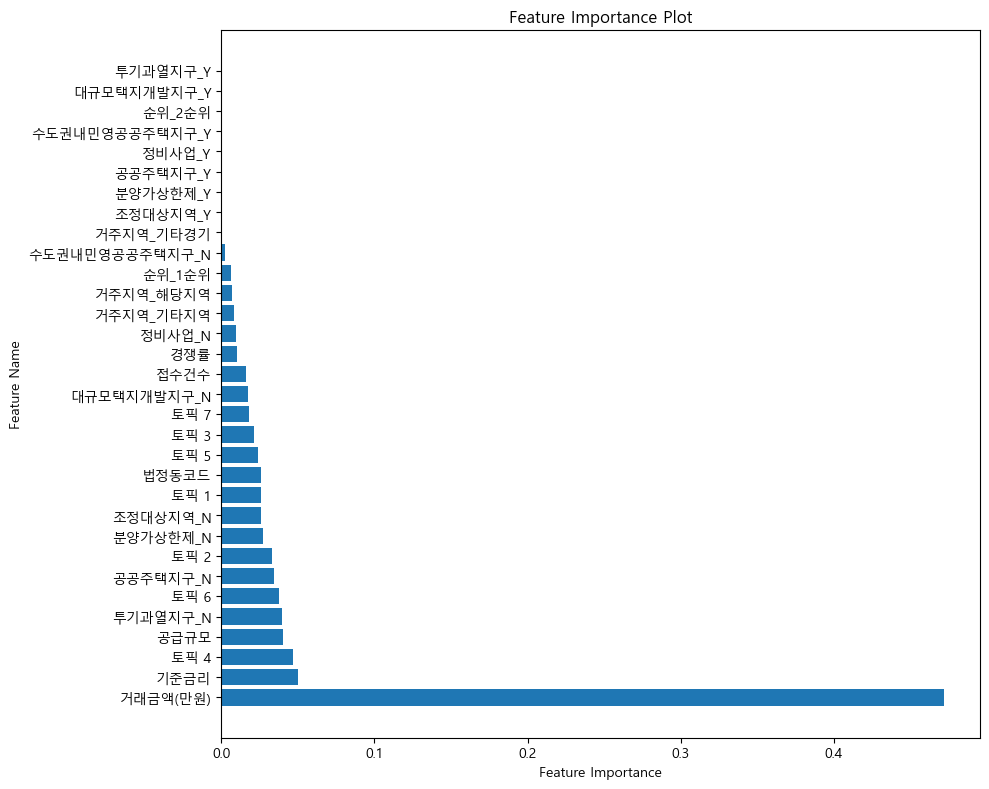

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
xgb_model = xgb.XGBRegressor(
    max_depth=6, 
    min_child_weight=4, 
    subsample=0.9, 
    eta=0.1, 
    n_estimators=100
)

xgb_model.fit(X_train_transformed, y_train)

y_pred_xgb = xgb_model.predict(X_test_transformed)

# RMSEÏôÄ R^2 Í≥ÑÏÇ∞ Ìï®Ïàò
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R^2: {r2_xgb}")

# Feature Importance ÌèâÍ∑† Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
# XGBoost Î™®Îç∏Ïùò feature_importances_ ÏÜçÏÑ±ÏùÑ ÏÇ¨Ïö©
feature_importances = xgb_model.feature_importances_

# Feature Importance ÏãúÍ∞ÅÌôî
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.barh(X_train_transformed.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.show()


### RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
rf_model = RandomForestRegressor()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï



rf_param_grid = {
    'n_estimators': np.arange(800, 1100, 100), 
    'max_depth': np.arange(10, 60, 10), 
    'max_features': np.arange(6, 17, 2),  
    'min_samples_leaf': np.arange(8, 19, 2),  
    'min_samples_split': np.arange(8, 21, 2) 
}


# ÎûúÎç§ ÏÑúÏπò ÏÑ§Ï†ï
rf_random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=rf_param_grid, 
    cv=5, 
    n_iter=100
)

# Î™®Îç∏ ÌïôÏäµ
rf_random_search.fit(X_train_transformed, y_train)

# Î≤†Ïä§Ìä∏ ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Î≤†Ïä§Ìä∏ ÌååÎùºÎØ∏ÌÑ∞:")
print(rf_random_search.best_params_)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏòàÏ∏° ÏàòÌñâ
y_pred = rf_random_search.best_estimator_.predict(X_test_transformed)
0
# RMSE Í≥ÑÏÇ∞
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R¬≤ Í≥ÑÏÇ∞
r2 = r2_score(y_test, y_pred)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ - RMSE: {rmse:.4f}, R¬≤: {r2:.4f}")


Î≤†Ïä§Ìä∏ ÌååÎùºÎØ∏ÌÑ∞:
{'n_estimators': np.int64(1000), 'min_samples_split': np.int64(12), 'min_samples_leaf': np.int64(10), 'max_features': np.int64(16), 'max_depth': np.int64(30)}
ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ - RMSE: 214569560.9500, R¬≤: 0.7530


Random Forest - RMSE: 215172506.1784876, R^2: 0.7516528544163371


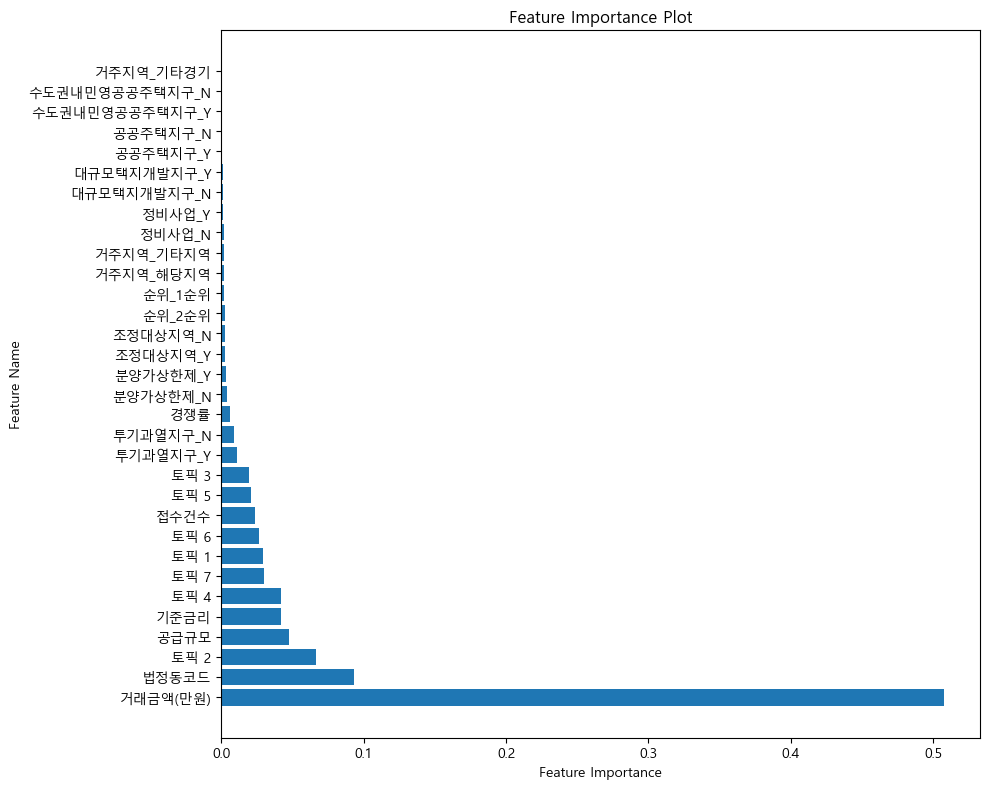

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
rf_model = RandomForestRegressor(
    max_depth=30, 
    max_features=16, 
    min_samples_leaf=10,
    min_samples_split=12, 
    n_estimators=1000
)

rf_model.fit(X_train_transformed, y_train)

y_pred_rf = rf_model.predict(X_test_transformed)

# RMSEÏôÄ R^2 Í≥ÑÏÇ∞ Ìï®Ïàò
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R^2: {r2_rf}")

# Feature Importance ÌèâÍ∑† Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†•
# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Ïùò feature_importances_ ÏÜçÏÑ±ÏùÑ ÏÇ¨Ïö©
feature_importances = rf_model.feature_importances_

# Feature Importance ÏãúÍ∞ÅÌôî
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.barh(X_train_transformed.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.show()

### Î™®Îç∏ Ï†ÄÏû• 

In [11]:
# Î™®Îç∏ Ï†ÄÏû• Î∞è Î°úÎìú

version = 'gain_lgb_0.0.1'

# Î™®Îç∏ Ï†ÄÏû•
joblib.dump(lgb_model, f"./storage/trained_model/model_{version}.pkl")

['./storage/trained_model/model_gain_lgb_0.0.1.pkl']

In [8]:
# Î™®Îç∏ Î°úÎìú
loaded_model = joblib.load("./storage/trained_model/model_0.0.1.pkl")

# ÏòàÏ∏°
# X_test = np.array([[1, 2]])
# prediction = loaded_model.predict(X_test)
# print("Prediction:", prediction)